In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point
from shapely.ops import nearest_points
from math import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stations = geopandas.read_file('geo/geo_export_d1cef8bd-bb80-491b-983e-fc4b3e3aab4f.shp')

In [3]:
stations.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)


In [4]:
stations.columns

Index(['line', 'name', 'notes', 'objectid', 'url', 'geometry'], dtype='object')

In [5]:
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   line      473 non-null    object  
 1   name      473 non-null    object  
 2   notes     473 non-null    object  
 3   objectid  473 non-null    float64 
 4   url       473 non-null    object  
 5   geometry  473 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 22.3+ KB


In [6]:
fare_arrests = pd.read_csv('Fare Evasion Arrests.csv')

In [7]:
fare_arrests.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [8]:
fare_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296473 entries, 0 to 296472
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         296473 non-null  int64  
 1   ARREST_DATE        296473 non-null  object 
 2   PD_CD              296473 non-null  float64
 3   PD_DESC            296473 non-null  object 
 4   KY_CD              296473 non-null  float64
 5   OFNS_DESC          296473 non-null  object 
 6   LAW_CODE           296473 non-null  object 
 7   LAW_CAT_CD         296473 non-null  object 
 8   ARREST_BORO        296473 non-null  object 
 9   ARREST_PRECINCT    296473 non-null  int64  
 10  JURISDICTION_CODE  296473 non-null  float64
 11  AGE_GROUP          296473 non-null  object 
 12  PERP_SEX           296473 non-null  object 
 13  PERP_RACE          296473 non-null  object 
 14  X_COORD_CD         296473 non-null  float64
 15  Y_COORD_CD         296473 non-null  float64
 16  La

In [9]:
len(fare_arrests.dropna())- len(fare_arrests)

0

In [10]:
arrests_gdf = geopandas.GeoDataFrame(
    fare_arrests[[
        'ARREST_KEY', 'ARREST_DATE', 'ARREST_BORO', 'ARREST_PRECINCT',
        'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude',
        'Longitude'
    ]],
    geometry=[
        Point(x, y)
        for x, y in zip(fare_arrests.Longitude, fare_arrests.Latitude)
    ])

In [11]:
arrests_gdf.head()

,ARREST_KEY,ARREST_DATE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,geometry
0,24079639,08/30/2006,K,84,1.0,18-24,M,BLACK,40.691465,-73.987348,POINT (-73.98735 40.69146)
1,194556724,03/11/2019,K,73,1.0,25-44,M,BLACK,40.662563,-73.908921,POINT (-73.90892 40.66256)
2,193088154,02/02/2019,B,49,0.0,25-44,F,WHITE,40.848833,-73.845047,POINT (-73.84505 40.84883)
3,193173213,02/05/2019,K,78,1.0,25-44,M,WHITE HISPANIC,40.684061,-73.977459,POINT (-73.97746 40.68406)
4,192365846,01/16/2019,B,44,0.0,45-64,M,BLACK,40.827820,-73.925931,POINT (-73.92593 40.82782)


In [12]:
arrests_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296473 entries, 0 to 296472
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ARREST_KEY         296473 non-null  int64   
 1   ARREST_DATE        296473 non-null  object  
 2   ARREST_BORO        296473 non-null  object  
 3   ARREST_PRECINCT    296473 non-null  int64   
 4   JURISDICTION_CODE  296473 non-null  float64 
 5   AGE_GROUP          296473 non-null  object  
 6   PERP_SEX           296473 non-null  object  
 7   PERP_RACE          296473 non-null  object  
 8   Latitude           296473 non-null  float64 
 9   Longitude          296473 non-null  float64 
 10  geometry           296473 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 24.9+ MB


In [13]:
unary = stations.geometry.unary_union

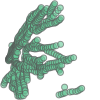

In [14]:
unary

In [15]:
def nearest_station(point, pts=unary):
     # find the nearest station and return it and the corresponding distance to that station
    nearest = stations.geometry == nearest_points(point, pts)[1]
    
    
    longs = stations[nearest].iloc[0].geometry.x
    lats = stations[nearest].iloc[0].geometry.y
    longp = point.x
    latp = point.y
    
    return [stations[nearest].iloc[0], haversine(longs, lats, longp, latp)]

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in km. Use 3956 for miles
    
    return c * r *1000 #conver to m

In [16]:
max_dist = 250

arrests_stations = pd.DataFrame()

for index, row in arrests_gdf.iterrows():
    [station, dist] = nearest_station(row.geometry)
    
    df = station[['line', 'name', 'notes', 'objectid']].copy()
    #df['index'] = index
    
    if dist <= max_dist:
        arrests_stations = arrests_stations.append(df)

KeyboardInterrupt: 

In [17]:
arrests_stations

,line,name,notes,objectid
367,A-C-F,Jay St - MetroTech,"A,F-all times, C-all times exc nights",368.0
217,3-4,Rockaway Ave,"4-nights, 3-all other times",218.0
115,2-3-4-5,Atlantic Av - Barclay's Center,"2,4-all times, 3-all times exc nights, 5-weekdays",116.0
296,B-D,161st St - Yankee Stadium,"B-rush hours, D-all times, skips rush hours AM...",297.0
234,L,DeKalb Ave,L-all times,235.0
...,...,...,...,...
255,2-5,174th St,"2-all times, 5-all times exc nights, skips rus...",256.0
438,1-2-3,14th St,"1,2-all times, 3-all times exc nights",439.0
43,2-5,Bronx Park East,"2-all times, 5-rush hours AM southbound, PM no...",44.0
26,6-6 Express,3rd Ave - 138th St,"6-all times, 6 Express-weekdays AM southbound,...",27.0


In [18]:
print(len(arrests_stations))

24272


In [19]:
arrests_stations.index = arrests_stations.index.astype('int64')
print(arrests_stations.head())

        line                            name  \
367    A-C-F              Jay St - MetroTech   
217      3-4                    Rockaway Ave   
115  2-3-4-5  Atlantic Av - Barclay's Center   
296      B-D       161st St - Yankee Stadium   
234        L                      DeKalb Ave   

                                                 notes  objectid  
367              A,F-all times, C-all times exc nights     368.0  
217                        4-nights, 3-all other times     218.0  
115  2,4-all times, 3-all times exc nights, 5-weekdays     116.0  
296  B-rush hours, D-all times, skips rush hours AM...     297.0  
234                                        L-all times     235.0  


In [20]:
arrests_assigned = arrests_gdf.merge(arrests_stations, left_index=True, right_index = True)

In [21]:
print(arrests_assigned.head())

   ARREST_KEY ARREST_DATE ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0    24079639  08/30/2006           K               84                1.0   
0    24079639  08/30/2006           K               84                1.0   
0    24079639  08/30/2006           K               84                1.0   
0    24079639  08/30/2006           K               84                1.0   
0    24079639  08/30/2006           K               84                1.0   

  AGE_GROUP PERP_SEX PERP_RACE   Latitude  Longitude  \
0     18-24        M     BLACK  40.691465 -73.987348   
0     18-24        M     BLACK  40.691465 -73.987348   
0     18-24        M     BLACK  40.691465 -73.987348   
0     18-24        M     BLACK  40.691465 -73.987348   
0     18-24        M     BLACK  40.691465 -73.987348   

                     geometry           line      name  \
0  POINT (-73.98735 40.69146)  4-6-6 Express  Astor Pl   
0  POINT (-73.98735 40.69146)  4-6-6 Express  Astor Pl   
0  POINT (-73.98735 40.691

In [22]:
print(len(arrests_assigned))

24272


In [23]:
#percent of arrests able to be attributible to stops w/ duplicates
100*len(arrests_assigned)/len(arrests_gdf)

8.1869175270598

In [25]:
#drop duplicates of arrests we couldn't uniquely attach to a station
arrests_assigned = arrests_assigned.drop_duplicates(subset='ARREST_KEY', keep = False)
print('Dropped: '+str(len(arrests_assigned) - len(arrests_stations))+ ' duplicates.')

Dropped: -24243 duplicates.


In [26]:
#drop rows with any columns na (ie we could not assign to stations)
arrests_assigned = arrests_assigned.dropna()
print('Dropped: '+str(len(arrests_assigned) - len(arrests_stations))+ ' nans.')

Dropped: -24243 nans.


In [24]:
arrests_assigned.to_csv('Arrests_Assigned_250m00000.csv')

In [ ]:
arrests_stations.groupby(['name', 'line']).count().reset_index().sort_values('objectid', ascending=False).drop('notes', axis=1).rename({'objectid': 'arrests'}, axis=1)

In [ ]:
arrests_assigned.head()